In [1]:
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import pandas as pd
from os.path import join as p_join
from os.path import split as p_split
from os.path import abspath
from pathlib import Path
TESTDIR = abspath('')
PROJDIR, _ = p_split(TESTDIR)

path_to_output = p_join(p_join(p_join(PROJDIR, "build"), "bin"), "output.csv")
path_to_data = p_join(TESTDIR, "output")
print("Test output:\t\t", path_to_data)
print("Terminal output:\t", path_to_output)

Test output:		 /home/theresa/ray/rayreworked/Tests/output
Terminal output:	 /home/theresa/ray/rayreworked/build/bin/output.csv


### output from TerminalApp

(20, 17) (20, 17)
-5.532500458333379
-5.48000114583354
0.0
-0.0004999999166666
-0.0004999999791666
0.9999997500000208
1.0
-5.532500458333379 5.480001145832811


,Index,Xloc,Yloc,Zloc,Weight,Xdir,Ydir,Zdir,Energy,Stokes0,Stokes1,Stokes2,Stokes3,pathLength,order,lastElement,extraParam
0,0,-5.532500,-5.480001,0.0,1.0,-0.000500,-0.000500,1.0,100.0,1.0,1.0,0.0,0.0,11000.002750,0.0,2.0,21.0
1,1,-1.844167,-5.480001,0.0,1.0,-0.000167,-0.000500,1.0,100.0,1.0,1.0,0.0,0.0,11000.001528,0.0,2.0,21.0
2,2,1.844167,-5.480001,0.0,1.0,0.000167,-0.000500,1.0,100.0,1.0,1.0,0.0,0.0,11000.001528,0.0,2.0,21.0
3,3,5.532500,-5.480001,0.0,1.0,0.000500,-0.000500,1.0,100.0,1.0,1.0,0.0,0.0,11000.002750,0.0,2.0,21.0
4,4,-5.532500,-1.826667,0.0,1.0,-0.000500,-0.000167,1.0,100.0,1.0,1.0,0.0,0.0,11000.001528,0.0,2.0,21.0
5,5,-1.844167,-1.826667,0.0,1.0,-0.000167,-0.000167,1.0,100.0,1.0,1.0,0.0,0.0,11000.000306,0.0,2.0,21.0
6,6,1.844167,-1.826667,0.0,1.0,0.000167,-0.000167,1.0,100.0,1.0,1.0,0.0,0.0,11000.000306,0.0,2.0,21.0
7,7,5.532500,-1.826667,0.0,1.0,0.000500,-0.000167,1.0,100.0,1.0,1.0,0.0,0.0,11000.001528,0.0,2.0,21.0
8,8,-5.532500,1.826667,0.0,1.0,-0.000500,0.000167,1.0,100.0,1.0,1.0,0.0,0.0,11000.001528,0.0,2.0,21.0
9,9,-1.844167,1.826667,0.0,1.0,-0.000167,0.000167,1.0,100.0,1.0,1.0,0.0,0.0,11000.000306,0.0,2.0,21.0


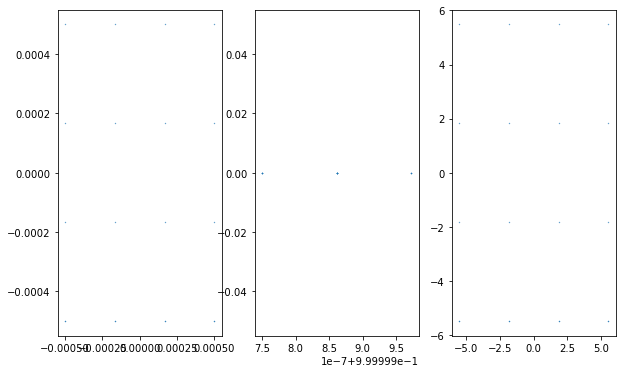

In [2]:
## test functions
data = pd.read_csv(path_to_output, sep=';',header=0)
#data = pd.read_csv(p_join(path_to_data,"testFile_randomUniform.csv"), sep=';',header=0)
fig, ax = plt.subplots(1, 3, figsize=(10, 6))
filtered = data[data['Weight']==1]
print(filtered.shape, data.shape,)
i = 0
print(filtered['Xloc'].values[i])
print(filtered['Yloc'].values[i])
print(filtered['Zloc'].values[i])

print(filtered['Xdir'].values[i])
print(filtered['Ydir'].values[i])
print(filtered['Zdir'].values[i])

print(filtered['Weight'].values[i])

print(min(filtered['Xloc']), (max(filtered['Yloc'])))
#print(np.unique(filtered['Weight'], return_counts=True)[:20])
#print(filtered['Weight'][:20])
#print(filtered['Energy'][:20])

s = 0.1
ax[0].scatter(filtered['Xdir'],filtered['Ydir'], s=s)
ax[1].scatter(filtered['Zdir'],filtered['Zloc'], s=s)
ax[2].scatter(filtered['Xloc'],filtered['Yloc'], s=s)
filtered

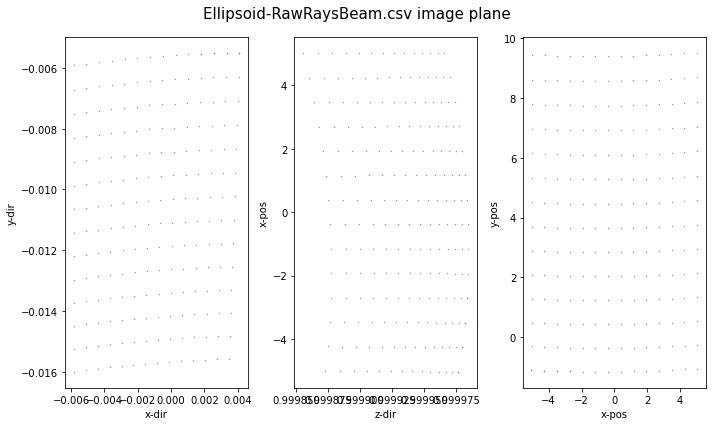

In [3]:
#load from file:
path = p_join(TESTDIR, "oldray_files")
file = "Ellipsoid-RawRaysBeam.csv"
minus_first_rzp2 = p_join(path, file)
#minus_first_rzp2 = p_join(minus_first_rzp2, "data")

rzp_minus_first_rzp2_path = minus_first_rzp2#p_join(minus_first_rzp2, 'imageplane_beam.csv')
rzp_minus_first_rzp2 = pd.read_csv(rzp_minus_first_rzp2_path, sep=';',header=0)

#ip_minus_first_rzp2_path = p_join(minus_first_rzp2, 'imageplane_beam.csv')
#ip_minus_first_rzp2 = pd.read_csv(ip_minus_first_rzp2_path, sep=';',header=0)

x = rzp_minus_first_rzp2[rzp_minus_first_rzp2.columns[6]].values.astype(float)
y = rzp_minus_first_rzp2[rzp_minus_first_rzp2.columns[7]].values.astype(float)
z = rzp_minus_first_rzp2[rzp_minus_first_rzp2.columns[8]].values.astype(float)


ox = rzp_minus_first_rzp2[rzp_minus_first_rzp2.columns[3]].values.astype(float)
oy = rzp_minus_first_rzp2[rzp_minus_first_rzp2.columns[4]].values.astype(float)
oz = rzp_minus_first_rzp2[rzp_minus_first_rzp2.columns[5]].values.astype(float)
#assert(np.all(oz == 385))

fig, ax = plt.subplots(1, 3, figsize=(10, 6))
fig.suptitle(file+" image plane", fontsize=15)
ax[0].scatter(x,y, s=0.1)
ax[0].set_xlabel('x-dir')
ax[0].set_ylabel('y-dir')
ax[1].scatter(z,ox, s=0.1)
ax[1].set_xlabel('z-dir')
ax[1].set_ylabel('x-pos')
ax[2].scatter(ox,oy, s=0.1)
ax[2].set_xlabel('x-pos')
ax[2].set_ylabel('y-pos')
fig.tight_layout()


### any output file from the test directionary

(20000,)


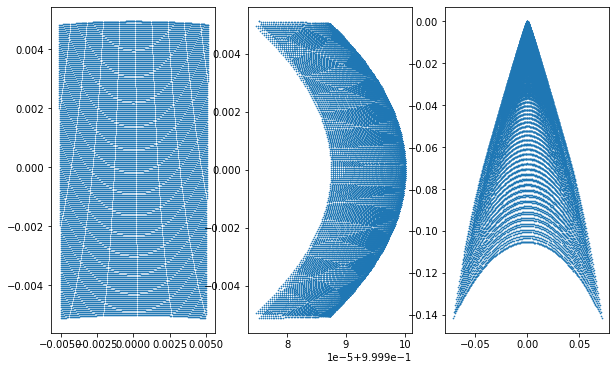

In [10]:
folder = p_join(TESTDIR, "output")
file = p_join(folder, "testFile_toroid.csv")

file= pd.read_csv(file, sep=';',header=0)

filtered = file[file['extraParam']==21]

x = filtered['Xdir'].values.astype(float)
y = filtered['Ydir'].values.astype(float)
z = filtered['Zdir'].values.astype(float)


ox = filtered['Xloc'].values.astype(float)
oy = filtered['Yloc'].values.astype(float)
oz = filtered['Zloc'].values.astype(float)
print(x.shape)
fig, ax = plt.subplots(1, 3, figsize=(10, 6))
size = 0.4
ax[0].scatter(x,y, s=size)
ax[1].scatter(z,x, s=size)
ax[2].scatter(ox,oy, s=size)

(20000,)


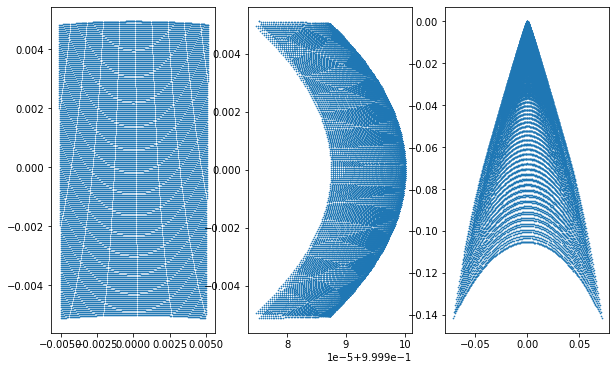

In [12]:
folder = p_join(TESTDIR, "output")
file = p_join(folder, "testFile_toroid.csv")

file= pd.read_csv(file, sep=';',header=0)

filtered = file[file['extraParam']==21]

x = filtered['Xdir'].values.astype(float)
y = filtered['Ydir'].values.astype(float)
z = filtered['Zdir'].values.astype(float)


ox = filtered['Xloc'].values.astype(float)
oy = filtered['Yloc'].values.astype(float)
oz = filtered['Zloc'].values.astype(float)
print(x.shape)
fig, ax = plt.subplots(1, 3, figsize=(10, 6))
size = 0.4
ax[0].scatter(x,y, s=size)
ax[1].scatter(z,x, s=size)
ax[2].scatter(ox,oy, s=size)

# spec1-first_rzp4mm

## RZP

## Image Plane

0        21
2        21
5        21
6        21
7        21
         ..
19988    21
19989    21
19994    21
19995    21
19996    21
Name: extraParam, Length: 9285, dtype: int64


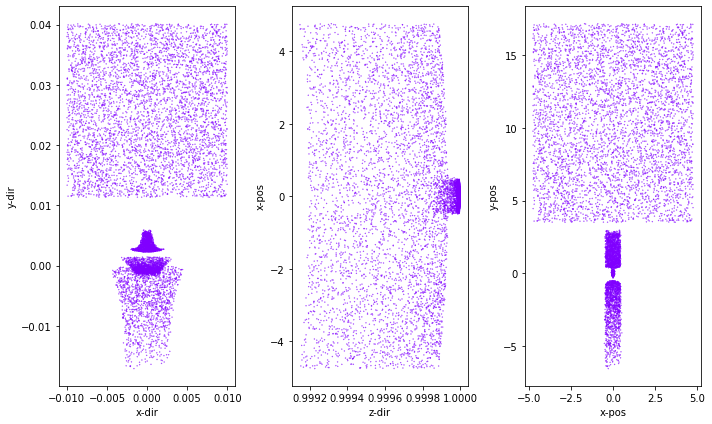

In [16]:
data_ip = pd.read_csv(p_join(path_to_data,"testFile_Spec1-first_rzp4mm.csv"), sep=';',header=0)
fig, ax = plt.subplots(1, 3, figsize=(10, 6))

"""
use ==1 to get only those that hit the rzp and then the image plane (like old ray and the image below)
use !=0 to get all rays that hit the image plane (even those that do not hit the rzp first)
use ==2 to get all rays that miss the rzp and directly go to the image plane
"""
filtered = data_ip[data_ip['Weight']==1]

print(filtered.extraParam)
assert(np.all(filtered[filtered['Weight']!=0]['Zloc'].values == 0))

ax[0].scatter(filtered['Xdir'],filtered['Ydir'], c=filtered['extraParam'], cmap='rainbow', s=0.1)
ax[0].set_xlabel('x-dir')
ax[0].set_ylabel('y-dir')
ax[1].scatter(filtered['Zdir'],filtered['Xloc'], c=filtered['extraParam'], cmap='rainbow', s=0.1)
ax[1].set_xlabel('z-dir')
ax[1].set_ylabel('x-pos')
ax[2].scatter(filtered['Xloc'],filtered['Yloc'], c=filtered['extraParam'], cmap='rainbow', s=0.1)
ax[2].set_xlabel('x-pos')
ax[2].set_ylabel('y-pos')
fig.tight_layout()

should look like this:
![](oldray_files/spec1-first_rzp4mm/imageplane.png)

# spec1+first_rzp4mm

## RZP

![](output/spec1+first_rzp4mm/rzp.png)

## IMAGE PLANE

(9511, 17)


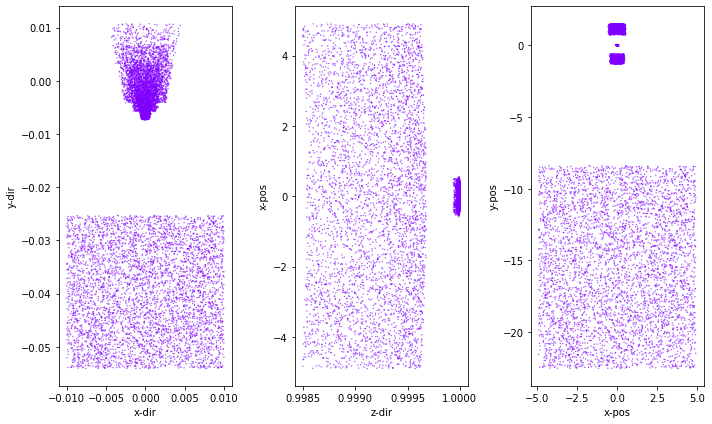

In [20]:
data_rzp = pd.read_csv(p_join(path_to_data,"testFile_Spec1+first_rzp4mm.csv"), sep=';',header=0)
fig, ax = plt.subplots(1, 3, figsize=(10, 6))
"""
use ==1 to get only those that hit the rzp and then the image plane (like old ray and the image below)
use !=0 to get all rays that hit the image plane (even those that do not hit the rzp first)
use ==2 to get all rays that miss the rzp and directly go to the image plane
"""
filtered = data_rzp[data_rzp['Weight']==1] 
print(filtered.shape)

assert(np.all(filtered[filtered['Weight']==1]['Zloc'].values == 0))

ax[0].scatter(filtered['Xdir'],filtered['Ydir'], c=filtered['Weight'], cmap='rainbow', s=0.1)
ax[0].set_xlabel('x-dir')
ax[0].set_ylabel('y-dir')
ax[1].scatter(filtered['Zdir'],filtered['Xloc'], c=filtered['Weight'], cmap='rainbow', s=0.1)
ax[1].set_xlabel('z-dir')
ax[1].set_ylabel('x-pos')
ax[2].scatter(filtered['Xloc'],filtered['Yloc'], c=filtered['Weight'], cmap='rainbow', s=0.1)
ax[2].set_xlabel('x-pos')
ax[2].set_ylabel('y-pos')
fig.tight_layout()

should look like this:
![](oldray_files/spec1+first_rzp4mm/imageplane.png)

# spec1-first_rzp02

## rzp only

## image plane

(9286, 17)


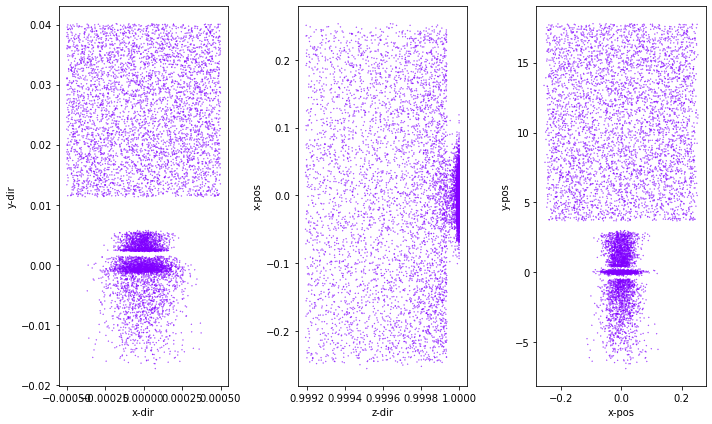

In [22]:
data_rzp = pd.read_csv(p_join(path_to_data,"testFile_Spec1-first_rzp02mm.csv"), sep=';',header=0)
fig, ax = plt.subplots(1, 3, figsize=(10, 6))

"""
use ==1 to get only those that hit the rzp and then the image plane (like old ray and the image below)
use !=0 to get all rays that hit the image plane (even those that do not hit the rzp first)
use ==2 to get all rays that miss the rzp and directly go to the image plane
"""
filtered = data_rzp[data_rzp['Weight']==1]
print(filtered.shape)
assert(np.all(filtered[filtered['Weight']!=0]['Zloc'].values == 0))

ax[0].scatter(filtered['Xdir'],filtered['Ydir'], c=filtered['Weight'], cmap='rainbow', s=0.1)
ax[0].set_xlabel('x-dir')
ax[0].set_ylabel('y-dir')
ax[1].scatter(filtered['Zdir'],filtered['Xloc'], c=filtered['Weight'], cmap='rainbow', s=0.1)
ax[1].set_xlabel('z-dir')
ax[1].set_ylabel('x-pos')
ax[2].scatter(filtered['Xloc'],filtered['Yloc'], c=filtered['Weight'], cmap='rainbow', s=0.1)
ax[2].set_xlabel('x-pos')
ax[2].set_ylabel('y-pos')
fig.tight_layout()

should look like this:
![](oldray_files/spec1-first_rzp02/imageplane.png)